In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

1. Загрузите данные, объедините источники в один датафрейм. Составьте целевую переменную на основе файла, из которого вы получили часть данных, изучите распределение по ней. Проверьте отсутствие пропусков в данных, отделите фичи и целевой признак друг от друга, разделите данные на обучающую и валидационную части.

In [2]:
# загружаем данные о красном вине
df_red_win = pd.read_csv('C:/Users/Z/PycharmProjects/data_science_1t/task_2.3/wine/winequality-red.csv', sep=';')
df_red_win.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
# загружаем данные о белом вине
df_white_win = pd.read_csv('C:/Users/Z/PycharmProjects/data_science_1t/task_2.3/wine/winequality-white.csv', sep=';')
df_white_win.info()
df_white_win.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# Добавим в датафреймы новый столбец type_win - тип вина, где белое - 0, красное - 1
df_white_win['type_win'] = 0
df_red_win['type_win'] = 1

In [5]:
#Объединяем датафреймы
df = pd.concat([df_red_win, df_white_win], ignore_index=True, sort=False)

In [6]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type_win              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_win
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [7]:
#Составьте целевую переменную на основе файла, 
# из которого вы получили часть данных, изучите распределение по ней.
target_type_win = df.type_win
target_type_win.describe()

count    6497.000000
mean        0.246114
std         0.430779
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: type_win, dtype: float64

<p style="border:3px #00B344  solid;">
<b>Вывод: </b> Целевой признак имеет не равномерное распределение. Записей с красным вином намного болше, чем с белым вином.

In [8]:
#Проверьте отсутствие пропусков в данных
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type_win                0
dtype: int64

<p style="border:3px #00B344  solid;">
<b>Вывод: </b> Пропуски отсутствуют. 

In [9]:
features = df.drop(['type_win'], axis=1)
#Разделяем датасет на тренировочную и валидационную части
features_train, features_test, target_wine_train, target_wine_test = train_test_split(features, target_type_win, test_size=0.3, random_state=45)

2. Поскольку выборка несбалансирована, воспользуемся для оценки качества модели новой метрикой balanced_accuracy_score. Изучите формулу расчета метрики в документации и реализуйте функцию balanced_accuracy_score_my для ее расчета. На вход она должна принимать правильные и прогнозные метки классов, а возвращать число от 0 до 1. Убедитесь, что вы корректно реализовали расчет, сравнив значения, получаемые библиотечной реализацией и собственной, подавая на вход векторы:
y_true = [0, 1, 1, 1, 1, 1, 1, 0, 1]
y_pred = [1, 0, 1, 1, 1, 1, 0, 0, 1]

In [10]:
y_true = [0, 1, 1, 1, 1, 1, 1, 0, 1]
y_pred = [1, 0, 1, 1, 1, 1, 0, 0, 1]
balanced_accuracy_score(y_true, y_pred)

0.6071428571428572

In [11]:
#Реализация метода balanced_accuracy_score_my
def balanced_accuracy_score_my(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    b_a = (tp/(tp + fn) + tn/(tn + fp))/2
    return b_a
balanced_accuracy_score_my(y_true, y_pred)

0.6071428571428572

<p style="border:3px #00B344  solid;">
<b>Вывод:</b> Сравнивая значения, получаемые библиотечной реализацией и собственной, можно сделать вывод, что расчет метрики balanced_accuracy_score реализован корректно.

3. Подберите лучшую модель решающего дерева:

        Переберите несколько значений какого-либо гиперпараметра, отвечающего за сложность дерева, для каждого значения оцените качество на обучающей и валидационной частях

        Визуализируйте зависимость качества модели от значения гиперпараметров. Опишите зоны недообучения и переобучения, если вы их наблюдаете.

        Выведите значение гиперпараметра, при котором качество модели на валидационной части наилучшее.

In [12]:
array = []
for min_samples_leaf_i in range(1, 30):
    model_DecisionTreeClassifier = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf_i, random_state=5)
    model_DecisionTreeClassifier.fit(features_train, target_wine_train)
    pred_train_DTC = model_DecisionTreeClassifier.predict(features_train)
    pred_test_DTC = model_DecisionTreeClassifier.predict(features_test)

    array.append([min_samples_leaf_i, 
                  balanced_accuracy_score(target_wine_train, pred_train_DTC),
                  balanced_accuracy_score(target_wine_test, pred_test_DTC)])
array_df = pd.DataFrame(array, columns=['min_samples_leaf_i', 'bas_train', 'bas_test'])

<Axes: xlabel='min_samples_leaf_i'>

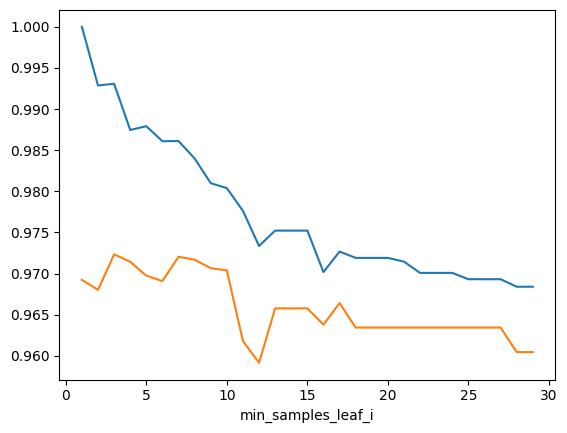

In [13]:
array_df.set_index('min_samples_leaf_i')['bas_train'].plot(label='bas_train')
array_df.set_index('min_samples_leaf_i')['bas_test'].plot(label='bas_test')

<p style="border:3px #00B344  solid;">
<b>Вывод:</b> Мы получили немного переобученную модель. Исходя из графика видно, что минимальное количество выборок должно быть не более 17.

Выведем значение min_samples_leaf_i (минимальное количество выборок), при котором качество модели наилучшее:
</p>

In [14]:
array_df[array_df['bas_test'] == array_df['bas_test'].max()]

,min_samples_leaf_i,bas_train,bas_test
2,3,0.993077,0.972342


4. Подберите лучшую модель случайного леса:

        Переберите несколько значений какого-либо гиперпараметра дерева и для каждого из них — несколько значений гиперпараметра, отвечающего за количество решающих деревьев в случайном лесу. Для каждой комбинации гиперпараметров оцените качество на валидационной части.

        Визуализируйте зависимость качества модели от значений гиперпараметров с помощью функции imshow. Опишите особенности, которые вы наблюдаете.

        Выведите значения гиперпараметров, при которых качество модели на валидационной части выборки наилучшее.

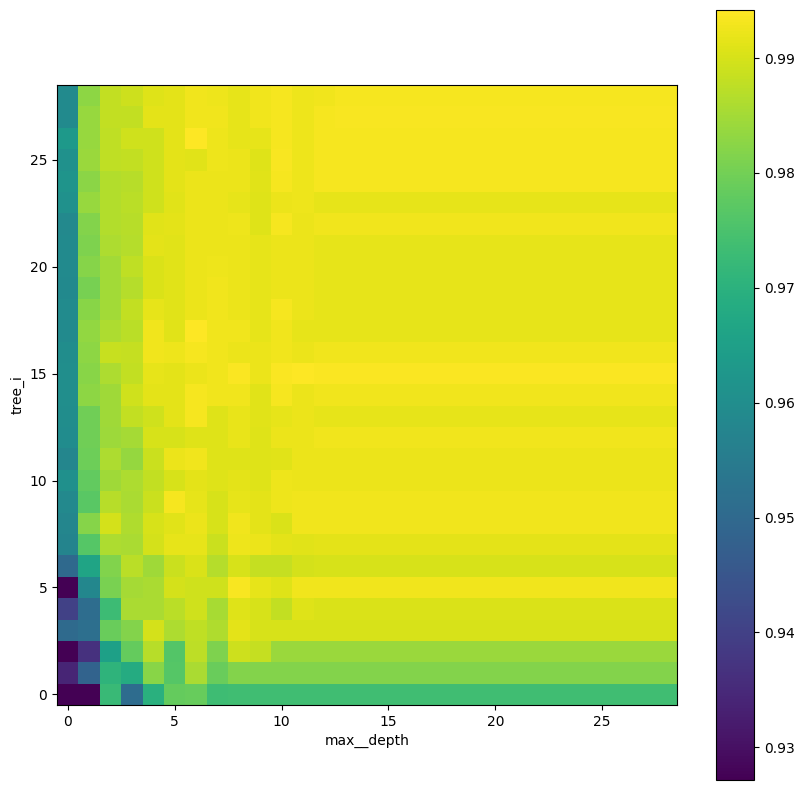

In [15]:
result = []
for tree_i in range(1, 30):
    for max__depth in range(1, 30):
        model_RandomForestClassifier = RandomForestClassifier(n_estimators=tree_i, 
                                                              max_depth=max__depth, min_samples_leaf=3, 
                                                              random_state=7)
        model_RandomForestClassifier.fit(features_train, target_wine_train)
        pred_train_RFC = model_RandomForestClassifier.predict(features_train)
        pred_test_RFC = model_RandomForestClassifier.predict(features_test)
        
        result.append([tree_i, max__depth, balanced_accuracy_score(pred_train_RFC, target_wine_train), balanced_accuracy_score(pred_test_RFC, target_wine_test)])
    result_df = pd.DataFrame(result, columns=['tree_i', 'max__depth', 'accuracy_train', 'accuracy_test'])
plt.figure(figsize=(10, 10))
plt.imshow(result_df.pivot(index='tree_i', columns='max__depth', values='accuracy_test'), aspect='equal', origin='lower')
plt.xlabel('max__depth')
plt.ylabel('tree_i')
plt.colorbar()
plt.show()

In [16]:
result_df[result_df['accuracy_test'] == result_df['accuracy_test'].max()]

,tree_i,max__depth,accuracy_train,accuracy_test
446,16,12,0.997201,0.994185
499,18,7,0.997373,0.994185
760,27,7,0.997373,0.994185


<p style="border:3px #00B344  solid;">
<b>Вывод:</b> Исходя из полученной тепловой карты можно сделать вывод, что при количестве деревьев больше 7 и глубине больше 5 уже получается неплохое качество модели.
Наилучшее качество модели будет при количестве деревьев 18 и глубине дерева 7.
</p>

5. Подберите лучший вариант градиентного бустинга:

        Выделите из обучающей части данных часть для валидации градиентного бустинга в ходе обучения.

In [17]:
features_train_xgb, features_test_xgb, target_train_xgb, target_test_xgb = train_test_split(
    features_train, 
    target_wine_train, 
    test_size=0.15, 
    random_state=42)

        Зафиксируйте небольшое количество деревьев, значение какого-либо параметра, отвечающего за сложность решающих деревьев и значение величины шага градиентного бустинга. Обучите градиентный бустинг с выбранными параметрами, выводя в процессе обучения значение функции потерь на обучающей и валидационной частях. Выведите значение метрики качества на экран.     

[0]	validation_0-logloss:0.15227	validation_1-logloss:0.26974
[1]	validation_0-logloss:7.29711	validation_1-logloss:7.57689
[2]	validation_0-logloss:2.94554	validation_1-logloss:2.87935
Ошибка MAE на обучающей выборке: 0.08137233340664174
Ошибка MAE на валидационной выборке: 0.07692307692307693


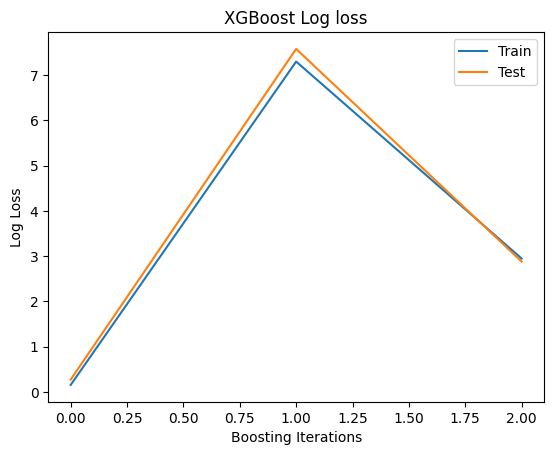

In [18]:
model_xgb = XGBClassifier(n_estimators=3, max_depth=3, learning_rate=5)
model_xgb.fit(features_train_xgb, target_train_xgb, eval_set=[(features_train_xgb, target_train_xgb), (features_test_xgb, target_test_xgb)])
pred_train = model_xgb.predict(features_train)
pred_test = model_xgb.predict(features_test)

print(f'Ошибка MAE на обучающей выборке: {mean_absolute_error(pred_train, target_wine_train)}')
print(f'Ошибка MAE на валидационной выборке: {mean_absolute_error(pred_test, target_wine_test)}')

epochs = len(model_xgb.evals_result()['validation_0']['logloss'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()

ax.plot(x_axis, model_xgb.evals_result()['validation_0']['logloss'], label='Train')
ax.plot(x_axis, model_xgb.evals_result()['validation_1']['logloss'], label='Test')

plt.title('XGBoost Log loss')
plt.xlabel("Boosting Iterations")
plt.ylabel("Log Loss")
plt.legend(loc="upper right")

<p style="border:3px #00B344  solid;">
<b>Вывод: Получилась очень не качественная модель, так как шаг слишом большой</b>
</p>

        На фиксированном небольшом количестве деревьев сравните 3-4 комбинации значений параметров величины шага градиентного бустинга и какого-либо параметра, отвечающего за сложность решающих деревьев.

In [19]:
#Не понимаю, почему не работает!
result_xgb = []
for i in range(1, 5):
    for j in range(1, 5):
        for k in range(1, 10):
            model_xgb = XGBClassifier(n_estimators=i, max_depth=j, learning_rate=k/10)
            model_xgb.fit(features_train_xgb, target_train_xgb, eval_set=[(features_train_xgb, target_train_xgb), (features_test_xgb, target_test_xgb)])
            pred_train = model_xgb.predict(features_train)
            pred_test = model_xgb.predict(features_test)
            print(f'Ошибка MAE на обучающей выборке: {mean_absolute_error(pred_train, target_wine_train)}')
            print(f'Ошибка MAE на валидационной выборке: {mean_absolute_error(pred_test, target_wine_test)}')
            result_xgb.append([i, j, k,  balanced_accuracy_score(pred_train, target_wine_train), balanced_accuracy_score(pred_test, target_wine_test)])
result_xgb = pd.DataFrame(result, columns=['n_estimators', 'max__depth', 'learning_rate', 'accuracy_train', 'accuracy_test'])
result_xgb.aaccuracy_test.max()

[0]	validation_0-logloss:0.62433	validation_1-logloss:0.62489
Ошибка MAE на обучающей выборке: 0.07499450186936442
Ошибка MAE на валидационной выборке: 0.07076923076923076
[0]	validation_0-logloss:0.56268	validation_1-logloss:0.56380
Ошибка MAE на обучающей выборке: 0.07499450186936442
Ошибка MAE на валидационной выборке: 0.07076923076923076
[0]	validation_0-logloss:0.50805	validation_1-logloss:0.50972
Ошибка MAE на обучающей выборке: 0.07499450186936442
Ошибка MAE на валидационной выборке: 0.07076923076923076
[0]	validation_0-logloss:0.46018	validation_1-logloss:0.46241
Ошибка MAE на обучающей выборке: 0.07499450186936442
Ошибка MAE на валидационной выборке: 0.07076923076923076
[0]	validation_0-logloss:0.41876	validation_1-logloss:0.42153
Ошибка MAE на обучающей выборке: 0.07499450186936442
Ошибка MAE на валидационной выборке: 0.07076923076923076
[0]	validation_0-logloss:0.38339	validation_1-logloss:0.38671
Ошибка MAE на обучающей выборке: 0.07499450186936442
Ошибка MAE на валидационн

ValueError: 5 columns passed, passed data had 4 columns

In [ ]:
#Списал
depth = 4
rate = 5
bas_matrix = np.zeros((depth, rate))

for i in range(depth):
    for j in range(rate):
        model = XGBClassifier(n_estimators=2, max_depth=(1+i), learning_rate=((1+j)/10))
        model.fit(features_train_xgb, target_train_xgb, eval_set=[(features_train_xgb, target_train_xgb), (features_test_xgb, target_test_xgb)])
        pred_test = model.predict(features_test)
        bas_matrix[i, j] = balanced_accuracy_score(target_wine_test, pred_test)

[0]	validation_0-logloss:0.62433	validation_1-logloss:0.62489
[1]	validation_0-logloss:0.56547	validation_1-logloss:0.56627
[0]	validation_0-logloss:0.56268	validation_1-logloss:0.56380
[1]	validation_0-logloss:0.46602	validation_1-logloss:0.46746
[0]	validation_0-logloss:0.50805	validation_1-logloss:0.50972
[1]	validation_0-logloss:0.38840	validation_1-logloss:0.39033
[0]	validation_0-logloss:0.46018	validation_1-logloss:0.46241
[1]	validation_0-logloss:0.32765	validation_1-logloss:0.32973
[0]	validation_0-logloss:0.41876	validation_1-logloss:0.42153
[1]	validation_0-logloss:0.28010	validation_1-logloss:0.28277
[0]	validation_0-logloss:0.60973	validation_1-logloss:0.60972
[1]	validation_0-logloss:0.54141	validation_1-logloss:0.54146
[0]	validation_0-logloss:0.53498	validation_1-logloss:0.53503
[1]	validation_0-logloss:0.42871	validation_1-logloss:0.42862
[0]	validation_0-logloss:0.46863	validation_1-logloss:0.46883
[1]	validation_0-logloss:0.34240	validation_1-logloss:0.33970
[0]	vali

<function matplotlib.pyplot.show(close=None, block=None)>

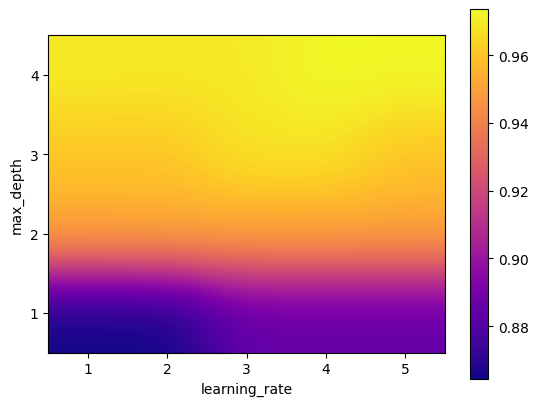

In [ ]:
plt.imshow(bas_matrix, cmap='plasma', interpolation='gaussian', origin='lower')
plt.xticks(np.arange(rate), range(1, rate + 1))
plt.yticks(np.arange(depth), range(1, depth + 1))
plt.xlabel('learning_rate')
plt.ylabel('max_depth')
plt.colorbar()
plt.show

        Выберите из рассмотренных комбинаций лучшую и обоснуйте свой выбор.      

In [ ]:
max_index = np.argmax(bas_matrix)
print(f'Максимальное значение метрики BAS - {np.max(bas_matrix)} при глубине {max_index // rate+1} и шаге {(max_index % rate + 1)/10}')

Максимальное значение метрики BAS - 0.9736391602011978 при глубине 4 и шаге 0.4


<p style="border:3px #00B344  solid;">
<b>Вывод: </b> Анализируя полученные графики можно сделать вывод, что с уменьшением шага обучения увеличивается качество модели.
<p style="border:3px #00B344  solid;">
Максимальное значение метрики BAS - 0.9736391602011978 при глубине 4 и шаге 0.4</p>


        Увеличьте количество деревьев и опишите эффект. Изучите значение гиперпараметра early_stopping_rounds и воспользуйтесь им, чтобы сэкономить время, войдя в переобучение модели.

In [ ]:
depth = 4
rate = 5
bas_matrix = np.zeros((depth, rate))

for i in range(depth):
    for j in range(rate):
        model = XGBClassifier(n_estimators=90, max_depth=(1+i), learning_rate=((1+j)/10))
        model.fit(features_train_xgb, target_train_xgb, early_stopping_rounds= 10, eval_set=[(features_train_xgb, target_train_xgb), (features_test_xgb, target_test_xgb)])
        pred_test = model.predict(features_test)
        bas_matrix[i, j] = balanced_accuracy_score(target_wine_test, pred_test)

[0]	validation_0-logloss:0.62433	validation_1-logloss:0.62489
[1]	validation_0-logloss:0.56547	validation_1-logloss:0.56627
[2]	validation_0-logloss:0.51667	validation_1-logloss:0.51789
[3]	validation_0-logloss:0.47363	validation_1-logloss:0.47495


c:\Users\Z\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-logloss:0.43727	validation_1-logloss:0.43868
[5]	validation_0-logloss:0.40497	validation_1-logloss:0.40610
[6]	validation_0-logloss:0.37716	validation_1-logloss:0.37809
[7]	validation_0-logloss:0.35233	validation_1-logloss:0.35340
[8]	validation_0-logloss:0.33044	validation_1-logloss:0.33146
[9]	validation_0-logloss:0.31102	validation_1-logloss:0.31166
[10]	validation_0-logloss:0.29361	validation_1-logloss:0.29410
[11]	validation_0-logloss:0.27794	validation_1-logloss:0.27907
[12]	validation_0-logloss:0.26349	validation_1-logloss:0.26398
[13]	validation_0-logloss:0.25058	validation_1-logloss:0.25076
[14]	validation_0-logloss:0.23874	validation_1-logloss:0.23935
[15]	validation_0-logloss:0.22787	validation_1-logloss:0.22910
[16]	validation_0-logloss:0.21796	validation_1-logloss:0.21878
[17]	validation_0-logloss:0.20872	validation_1-logloss:0.20941
[18]	validation_0-logloss:0.20038	validation_1-logloss:0.20164
[19]	validation_0-logloss:0.19270	validation_1-logloss:0.1936

c:\Users\Z\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-logloss:0.17500	validation_1-logloss:0.17742
[11]	validation_0-logloss:0.16316	validation_1-logloss:0.16538
[12]	validation_0-logloss:0.15302	validation_1-logloss:0.15501
[13]	validation_0-logloss:0.14420	validation_1-logloss:0.14600
[14]	validation_0-logloss:0.13614	validation_1-logloss:0.13880
[15]	validation_0-logloss:0.12873	validation_1-logloss:0.13097
[16]	validation_0-logloss:0.12262	validation_1-logloss:0.12468
[17]	validation_0-logloss:0.11698	validation_1-logloss:0.11883
[18]	validation_0-logloss:0.11168	validation_1-logloss:0.11335
[19]	validation_0-logloss:0.10678	validation_1-logloss:0.10969
[20]	validation_0-logloss:0.10241	validation_1-logloss:0.10536
[21]	validation_0-logloss:0.09846	validation_1-logloss:0.10064
[22]	validation_0-logloss:0.09454	validation_1-logloss:0.09714
[23]	validation_0-logloss:0.09097	validation_1-logloss:0.09381
[24]	validation_0-logloss:0.08771	validation_1-logloss:0.09110
[25]	validation_0-logloss:0.08472	validation_1-logloss:

c:\Users\Z\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-logloss:0.08477	validation_1-logloss:0.08728
[17]	validation_0-logloss:0.08035	validation_1-logloss:0.08349
[18]	validation_0-logloss:0.07605	validation_1-logloss:0.07940
[19]	validation_0-logloss:0.07249	validation_1-logloss:0.07635
[20]	validation_0-logloss:0.06930	validation_1-logloss:0.07350
[21]	validation_0-logloss:0.06617	validation_1-logloss:0.07047
[22]	validation_0-logloss:0.06336	validation_1-logloss:0.06849
[23]	validation_0-logloss:0.06090	validation_1-logloss:0.06640
[24]	validation_0-logloss:0.05864	validation_1-logloss:0.06438
[25]	validation_0-logloss:0.05648	validation_1-logloss:0.06223
[26]	validation_0-logloss:0.05454	validation_1-logloss:0.06024
[27]	validation_0-logloss:0.05257	validation_1-logloss:0.05876
[28]	validation_0-logloss:0.05079	validation_1-logloss:0.05728
[29]	validation_0-logloss:0.04924	validation_1-logloss:0.05581
[30]	validation_0-logloss:0.04771	validation_1-logloss:0.05359
[31]	validation_0-logloss:0.04628	validation_1-logloss:

c:\Users\Z\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[22]	validation_0-logloss:0.04591	validation_1-logloss:0.05349
[23]	validation_0-logloss:0.04414	validation_1-logloss:0.05124
[24]	validation_0-logloss:0.04248	validation_1-logloss:0.04870
[25]	validation_0-logloss:0.04105	validation_1-logloss:0.04726
[26]	validation_0-logloss:0.03965	validation_1-logloss:0.04632
[27]	validation_0-logloss:0.03828	validation_1-logloss:0.04508
[28]	validation_0-logloss:0.03698	validation_1-logloss:0.04387
[29]	validation_0-logloss:0.03584	validation_1-logloss:0.04312
[30]	validation_0-logloss:0.03467	validation_1-logloss:0.04214
[31]	validation_0-logloss:0.03367	validation_1-logloss:0.04176
[32]	validation_0-logloss:0.03274	validation_1-logloss:0.04098
[33]	validation_0-logloss:0.03192	validation_1-logloss:0.04025
[34]	validation_0-logloss:0.03112	validation_1-logloss:0.03922
[35]	validation_0-logloss:0.03038	validation_1-logloss:0.03799
[36]	validation_0-logloss:0.02963	validation_1-logloss:0.03691
[37]	validation_0-logloss:0.02902	validation_1-logloss

c:\Users\Z\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-logloss:0.04300	validation_1-logloss:0.04860
[19]	validation_0-logloss:0.04120	validation_1-logloss:0.04728
[20]	validation_0-logloss:0.03916	validation_1-logloss:0.04529
[21]	validation_0-logloss:0.03765	validation_1-logloss:0.04425
[22]	validation_0-logloss:0.03613	validation_1-logloss:0.04217
[23]	validation_0-logloss:0.03490	validation_1-logloss:0.04145
[24]	validation_0-logloss:0.03361	validation_1-logloss:0.04027
[25]	validation_0-logloss:0.03249	validation_1-logloss:0.03966
[26]	validation_0-logloss:0.03140	validation_1-logloss:0.03900
[27]	validation_0-logloss:0.03048	validation_1-logloss:0.03845
[28]	validation_0-logloss:0.02952	validation_1-logloss:0.03732
[29]	validation_0-logloss:0.02865	validation_1-logloss:0.03709
[30]	validation_0-logloss:0.02792	validation_1-logloss:0.03651
[31]	validation_0-logloss:0.02697	validation_1-logloss:0.03483
[32]	validation_0-logloss:0.02632	validation_1-logloss:0.03443
[33]	validation_0-logloss:0.02556	validation_1-logloss:

c:\Users\Z\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-logloss:0.13564	validation_1-logloss:0.13525
[19]	validation_0-logloss:0.12828	validation_1-logloss:0.12858
[20]	validation_0-logloss:0.12155	validation_1-logloss:0.12196
[21]	validation_0-logloss:0.11458	validation_1-logloss:0.11494
[22]	validation_0-logloss:0.10893	validation_1-logloss:0.10973
[23]	validation_0-logloss:0.10314	validation_1-logloss:0.10371
[24]	validation_0-logloss:0.09844	validation_1-logloss:0.09916
[25]	validation_0-logloss:0.09398	validation_1-logloss:0.09517
[26]	validation_0-logloss:0.08947	validation_1-logloss:0.09031
[27]	validation_0-logloss:0.08568	validation_1-logloss:0.08661
[28]	validation_0-logloss:0.08189	validation_1-logloss:0.08266
[29]	validation_0-logloss:0.07868	validation_1-logloss:0.08012
[30]	validation_0-logloss:0.07542	validation_1-logloss:0.07726
[31]	validation_0-logloss:0.07247	validation_1-logloss:0.07487
[32]	validation_0-logloss:0.06992	validation_1-logloss:0.07263
[33]	validation_0-logloss:0.06686	validation_1-logloss:

c:\Users\Z\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-logloss:0.07598	validation_1-logloss:0.07730
[15]	validation_0-logloss:0.07006	validation_1-logloss:0.07221
[16]	validation_0-logloss:0.06518	validation_1-logloss:0.06812
[17]	validation_0-logloss:0.06035	validation_1-logloss:0.06324
[18]	validation_0-logloss:0.05641	validation_1-logloss:0.05984
[19]	validation_0-logloss:0.05313	validation_1-logloss:0.05704
[20]	validation_0-logloss:0.04834	validation_1-logloss:0.05196
[21]	validation_0-logloss:0.04570	validation_1-logloss:0.04951
[22]	validation_0-logloss:0.04258	validation_1-logloss:0.04646
[23]	validation_0-logloss:0.04053	validation_1-logloss:0.04476
[24]	validation_0-logloss:0.03772	validation_1-logloss:0.04203
[25]	validation_0-logloss:0.03605	validation_1-logloss:0.04060
[26]	validation_0-logloss:0.03415	validation_1-logloss:0.03867
[27]	validation_0-logloss:0.03287	validation_1-logloss:0.03760
[28]	validation_0-logloss:0.03103	validation_1-logloss:0.03561
[29]	validation_0-logloss:0.02982	validation_1-logloss:

c:\Users\Z\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[26]	validation_0-logloss:0.02029	validation_1-logloss:0.02440
[27]	validation_0-logloss:0.01966	validation_1-logloss:0.02414
[28]	validation_0-logloss:0.01900	validation_1-logloss:0.02330
[29]	validation_0-logloss:0.01817	validation_1-logloss:0.02185
[30]	validation_0-logloss:0.01770	validation_1-logloss:0.02136
[31]	validation_0-logloss:0.01700	validation_1-logloss:0.02066
[32]	validation_0-logloss:0.01610	validation_1-logloss:0.01981
[33]	validation_0-logloss:0.01568	validation_1-logloss:0.01926
[34]	validation_0-logloss:0.01521	validation_1-logloss:0.01859
[35]	validation_0-logloss:0.01444	validation_1-logloss:0.01766
[36]	validation_0-logloss:0.01391	validation_1-logloss:0.01757
[37]	validation_0-logloss:0.01358	validation_1-logloss:0.01706
[38]	validation_0-logloss:0.01315	validation_1-logloss:0.01655
[39]	validation_0-logloss:0.01272	validation_1-logloss:0.01589
[40]	validation_0-logloss:0.01244	validation_1-logloss:0.01582
[41]	validation_0-logloss:0.01203	validation_1-logloss

c:\Users\Z\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-logloss:0.00850	validation_1-logloss:0.01420
[41]	validation_0-logloss:0.00829	validation_1-logloss:0.01333
[42]	validation_0-logloss:0.00814	validation_1-logloss:0.01305
[43]	validation_0-logloss:0.00782	validation_1-logloss:0.01254
[44]	validation_0-logloss:0.00766	validation_1-logloss:0.01253
[45]	validation_0-logloss:0.00743	validation_1-logloss:0.01279
[46]	validation_0-logloss:0.00720	validation_1-logloss:0.01270
[47]	validation_0-logloss:0.00695	validation_1-logloss:0.01228
[48]	validation_0-logloss:0.00681	validation_1-logloss:0.01181
[49]	validation_0-logloss:0.00670	validation_1-logloss:0.01150
[50]	validation_0-logloss:0.00655	validation_1-logloss:0.01167
[51]	validation_0-logloss:0.00634	validation_1-logloss:0.01118
[52]	validation_0-logloss:0.00622	validation_1-logloss:0.01150
[53]	validation_0-logloss:0.00609	validation_1-logloss:0.01132
[54]	validation_0-logloss:0.00600	validation_1-logloss:0.01095
[55]	validation_0-logloss:0.00587	validation_1-logloss:

c:\Users\Z\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[43]	validation_0-logloss:0.00532	validation_1-logloss:0.00958
[44]	validation_0-logloss:0.00520	validation_1-logloss:0.00935
[45]	validation_0-logloss:0.00506	validation_1-logloss:0.00930
[46]	validation_0-logloss:0.00495	validation_1-logloss:0.00889
[47]	validation_0-logloss:0.00483	validation_1-logloss:0.00898
[48]	validation_0-logloss:0.00473	validation_1-logloss:0.00849
[49]	validation_0-logloss:0.00453	validation_1-logloss:0.00850
[50]	validation_0-logloss:0.00445	validation_1-logloss:0.00813
[51]	validation_0-logloss:0.00426	validation_1-logloss:0.00771
[52]	validation_0-logloss:0.00419	validation_1-logloss:0.00746
[53]	validation_0-logloss:0.00408	validation_1-logloss:0.00765
[54]	validation_0-logloss:0.00396	validation_1-logloss:0.00770
[55]	validation_0-logloss:0.00384	validation_1-logloss:0.00760
[56]	validation_0-logloss:0.00374	validation_1-logloss:0.00762
[57]	validation_0-logloss:0.00359	validation_1-logloss:0.00706
[58]	validation_0-logloss:0.00344	validation_1-logloss:

c:\Users\Z\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[46]	validation_0-logloss:0.02472	validation_1-logloss:0.03363
[47]	validation_0-logloss:0.02384	validation_1-logloss:0.03277
[48]	validation_0-logloss:0.02304	validation_1-logloss:0.03185
[49]	validation_0-logloss:0.02237	validation_1-logloss:0.03130
[50]	validation_0-logloss:0.02168	validation_1-logloss:0.03027
[51]	validation_0-logloss:0.02094	validation_1-logloss:0.02972
[52]	validation_0-logloss:0.02015	validation_1-logloss:0.02890
[53]	validation_0-logloss:0.01958	validation_1-logloss:0.02850
[54]	validation_0-logloss:0.01904	validation_1-logloss:0.02813
[55]	validation_0-logloss:0.01839	validation_1-logloss:0.02733
[56]	validation_0-logloss:0.01804	validation_1-logloss:0.02695
[57]	validation_0-logloss:0.01755	validation_1-logloss:0.02659
[58]	validation_0-logloss:0.01720	validation_1-logloss:0.02630
[59]	validation_0-logloss:0.01677	validation_1-logloss:0.02601
[60]	validation_0-logloss:0.01612	validation_1-logloss:0.02510
[61]	validation_0-logloss:0.01576	validation_1-logloss:

c:\Users\Z\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[43]	validation_0-logloss:0.00861	validation_1-logloss:0.01606
[44]	validation_0-logloss:0.00824	validation_1-logloss:0.01589
[45]	validation_0-logloss:0.00797	validation_1-logloss:0.01544
[46]	validation_0-logloss:0.00770	validation_1-logloss:0.01507
[47]	validation_0-logloss:0.00741	validation_1-logloss:0.01482
[48]	validation_0-logloss:0.00718	validation_1-logloss:0.01420
[49]	validation_0-logloss:0.00689	validation_1-logloss:0.01413
[50]	validation_0-logloss:0.00671	validation_1-logloss:0.01357
[51]	validation_0-logloss:0.00649	validation_1-logloss:0.01350
[52]	validation_0-logloss:0.00634	validation_1-logloss:0.01344
[53]	validation_0-logloss:0.00612	validation_1-logloss:0.01321
[54]	validation_0-logloss:0.00592	validation_1-logloss:0.01272
[55]	validation_0-logloss:0.00575	validation_1-logloss:0.01253
[56]	validation_0-logloss:0.00561	validation_1-logloss:0.01217
[57]	validation_0-logloss:0.00541	validation_1-logloss:0.01211
[58]	validation_0-logloss:0.00529	validation_1-logloss:

c:\Users\Z\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[43]	validation_0-logloss:0.00429	validation_1-logloss:0.01046
[44]	validation_0-logloss:0.00414	validation_1-logloss:0.01046
[45]	validation_0-logloss:0.00398	validation_1-logloss:0.01035
[46]	validation_0-logloss:0.00384	validation_1-logloss:0.01008
[47]	validation_0-logloss:0.00374	validation_1-logloss:0.01015
[48]	validation_0-logloss:0.00360	validation_1-logloss:0.00961
[49]	validation_0-logloss:0.00349	validation_1-logloss:0.00925
[50]	validation_0-logloss:0.00334	validation_1-logloss:0.00931
[51]	validation_0-logloss:0.00322	validation_1-logloss:0.00881
[52]	validation_0-logloss:0.00312	validation_1-logloss:0.00867
[53]	validation_0-logloss:0.00304	validation_1-logloss:0.00857
[54]	validation_0-logloss:0.00297	validation_1-logloss:0.00855
[55]	validation_0-logloss:0.00290	validation_1-logloss:0.00838
[56]	validation_0-logloss:0.00282	validation_1-logloss:0.00814
[57]	validation_0-logloss:0.00275	validation_1-logloss:0.00802
[58]	validation_0-logloss:0.00264	validation_1-logloss:

c:\Users\Z\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-logloss:0.00283	validation_1-logloss:0.01102
[41]	validation_0-logloss:0.00272	validation_1-logloss:0.01066
[42]	validation_0-logloss:0.00259	validation_1-logloss:0.01047
[43]	validation_0-logloss:0.00246	validation_1-logloss:0.01062
[44]	validation_0-logloss:0.00236	validation_1-logloss:0.01048
[45]	validation_0-logloss:0.00229	validation_1-logloss:0.01038
[46]	validation_0-logloss:0.00221	validation_1-logloss:0.00990
[47]	validation_0-logloss:0.00214	validation_1-logloss:0.00968
[48]	validation_0-logloss:0.00206	validation_1-logloss:0.00946
[49]	validation_0-logloss:0.00200	validation_1-logloss:0.00934
[50]	validation_0-logloss:0.00195	validation_1-logloss:0.00910
[51]	validation_0-logloss:0.00190	validation_1-logloss:0.00881
[52]	validation_0-logloss:0.00182	validation_1-logloss:0.00861
[53]	validation_0-logloss:0.00178	validation_1-logloss:0.00866
[54]	validation_0-logloss:0.00174	validation_1-logloss:0.00829
[55]	validation_0-logloss:0.00171	validation_1-logloss:

c:\Users\Z\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[41]	validation_0-logloss:0.00180	validation_1-logloss:0.00756
[42]	validation_0-logloss:0.00176	validation_1-logloss:0.00737
[43]	validation_0-logloss:0.00171	validation_1-logloss:0.00758
[44]	validation_0-logloss:0.00166	validation_1-logloss:0.00736
[45]	validation_0-logloss:0.00161	validation_1-logloss:0.00723
[46]	validation_0-logloss:0.00154	validation_1-logloss:0.00689
[47]	validation_0-logloss:0.00152	validation_1-logloss:0.00685
[48]	validation_0-logloss:0.00149	validation_1-logloss:0.00665
[49]	validation_0-logloss:0.00146	validation_1-logloss:0.00693
[50]	validation_0-logloss:0.00143	validation_1-logloss:0.00672
[51]	validation_0-logloss:0.00141	validation_1-logloss:0.00661
[52]	validation_0-logloss:0.00138	validation_1-logloss:0.00669
[53]	validation_0-logloss:0.00136	validation_1-logloss:0.00657
[54]	validation_0-logloss:0.00134	validation_1-logloss:0.00652
[55]	validation_0-logloss:0.00133	validation_1-logloss:0.00638
[56]	validation_0-logloss:0.00130	validation_1-logloss:

c:\Users\Z\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-logloss:0.04652	validation_1-logloss:0.05796
[29]	validation_0-logloss:0.04366	validation_1-logloss:0.05524
[30]	validation_0-logloss:0.04111	validation_1-logloss:0.05277
[31]	validation_0-logloss:0.03871	validation_1-logloss:0.05053
[32]	validation_0-logloss:0.03634	validation_1-logloss:0.04766
[33]	validation_0-logloss:0.03423	validation_1-logloss:0.04573
[34]	validation_0-logloss:0.03243	validation_1-logloss:0.04409
[35]	validation_0-logloss:0.03044	validation_1-logloss:0.04186
[36]	validation_0-logloss:0.02861	validation_1-logloss:0.03998
[37]	validation_0-logloss:0.02705	validation_1-logloss:0.03820
[38]	validation_0-logloss:0.02548	validation_1-logloss:0.03648
[39]	validation_0-logloss:0.02406	validation_1-logloss:0.03519
[40]	validation_0-logloss:0.02284	validation_1-logloss:0.03380
[41]	validation_0-logloss:0.02167	validation_1-logloss:0.03288
[42]	validation_0-logloss:0.02055	validation_1-logloss:0.03184
[43]	validation_0-logloss:0.01955	validation_1-logloss:

c:\Users\Z\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-logloss:0.00909	validation_1-logloss:0.01839
[31]	validation_0-logloss:0.00861	validation_1-logloss:0.01755
[32]	validation_0-logloss:0.00809	validation_1-logloss:0.01715
[33]	validation_0-logloss:0.00765	validation_1-logloss:0.01654
[34]	validation_0-logloss:0.00726	validation_1-logloss:0.01620
[35]	validation_0-logloss:0.00679	validation_1-logloss:0.01536
[36]	validation_0-logloss:0.00646	validation_1-logloss:0.01532
[37]	validation_0-logloss:0.00620	validation_1-logloss:0.01530
[38]	validation_0-logloss:0.00589	validation_1-logloss:0.01484
[39]	validation_0-logloss:0.00561	validation_1-logloss:0.01484
[40]	validation_0-logloss:0.00541	validation_1-logloss:0.01476
[41]	validation_0-logloss:0.00521	validation_1-logloss:0.01445
[42]	validation_0-logloss:0.00501	validation_1-logloss:0.01400
[43]	validation_0-logloss:0.00482	validation_1-logloss:0.01367
[44]	validation_0-logloss:0.00464	validation_1-logloss:0.01357
[45]	validation_0-logloss:0.00442	validation_1-logloss:

c:\Users\Z\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-logloss:0.00371	validation_1-logloss:0.01404
[34]	validation_0-logloss:0.00350	validation_1-logloss:0.01427
[35]	validation_0-logloss:0.00333	validation_1-logloss:0.01430
[36]	validation_0-logloss:0.00321	validation_1-logloss:0.01427
[37]	validation_0-logloss:0.00303	validation_1-logloss:0.01368
[38]	validation_0-logloss:0.00290	validation_1-logloss:0.01326
[39]	validation_0-logloss:0.00279	validation_1-logloss:0.01287
[40]	validation_0-logloss:0.00267	validation_1-logloss:0.01232
[41]	validation_0-logloss:0.00258	validation_1-logloss:0.01252
[42]	validation_0-logloss:0.00250	validation_1-logloss:0.01220
[43]	validation_0-logloss:0.00242	validation_1-logloss:0.01195
[44]	validation_0-logloss:0.00237	validation_1-logloss:0.01196
[45]	validation_0-logloss:0.00228	validation_1-logloss:0.01210
[46]	validation_0-logloss:0.00222	validation_1-logloss:0.01213
[47]	validation_0-logloss:0.00215	validation_1-logloss:0.01223
[48]	validation_0-logloss:0.00208	validation_1-logloss:

c:\Users\Z\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[22]	validation_0-logloss:0.00430	validation_1-logloss:0.01414
[23]	validation_0-logloss:0.00403	validation_1-logloss:0.01358
[24]	validation_0-logloss:0.00370	validation_1-logloss:0.01310
[25]	validation_0-logloss:0.00351	validation_1-logloss:0.01294
[26]	validation_0-logloss:0.00331	validation_1-logloss:0.01248
[27]	validation_0-logloss:0.00310	validation_1-logloss:0.01326
[28]	validation_0-logloss:0.00294	validation_1-logloss:0.01320
[29]	validation_0-logloss:0.00283	validation_1-logloss:0.01310
[30]	validation_0-logloss:0.00271	validation_1-logloss:0.01260
[31]	validation_0-logloss:0.00260	validation_1-logloss:0.01244
[32]	validation_0-logloss:0.00247	validation_1-logloss:0.01262
[33]	validation_0-logloss:0.00234	validation_1-logloss:0.01250
[34]	validation_0-logloss:0.00224	validation_1-logloss:0.01261
[35]	validation_0-logloss:0.00216	validation_1-logloss:0.01227
[36]	validation_0-logloss:0.00207	validation_1-logloss:0.01256
[37]	validation_0-logloss:0.00201	validation_1-logloss

c:\Users\Z\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-logloss:0.00262	validation_1-logloss:0.01198
[25]	validation_0-logloss:0.00247	validation_1-logloss:0.01200
[26]	validation_0-logloss:0.00232	validation_1-logloss:0.01179
[27]	validation_0-logloss:0.00222	validation_1-logloss:0.01157
[28]	validation_0-logloss:0.00211	validation_1-logloss:0.01127
[29]	validation_0-logloss:0.00202	validation_1-logloss:0.01092
[30]	validation_0-logloss:0.00196	validation_1-logloss:0.01127
[31]	validation_0-logloss:0.00190	validation_1-logloss:0.01112
[32]	validation_0-logloss:0.00184	validation_1-logloss:0.01066
[33]	validation_0-logloss:0.00178	validation_1-logloss:0.01052
[34]	validation_0-logloss:0.00171	validation_1-logloss:0.01009
[35]	validation_0-logloss:0.00165	validation_1-logloss:0.01016
[36]	validation_0-logloss:0.00160	validation_1-logloss:0.00981
[37]	validation_0-logloss:0.00156	validation_1-logloss:0.00981
[38]	validation_0-logloss:0.00153	validation_1-logloss:0.01004
[39]	validation_0-logloss:0.00148	validation_1-logloss:

In [ ]:
max_index = np.argmax(bas_matrix)
print(f'Максимальное значение метрики BAS - {np.max(bas_matrix)} при глубине {max_index // rate+1} и шаге {(max_index % rate + 1)/10}')

Максимальное значение метрики BAS - 0.9923506644995267 при глубине 1 и шаге 0.5


6. В выводах напишите, какая модель показала себя лучше всего, какого качества удалось достичь.

Решающее дерево - 0.972342

Случайный лес - 0.994185

Градиентный бустинг - 0.99235
<p style="border:3px #00B344  solid;">
В итоге лучше всего получилась модель случайного леса.